In [323]:
from importlib import reload  # Python 3.4+
import simtoolkit.simtoolkit as sim
sim = reload(sim)
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) #if your plots turn out too large or small, adjust this


In [324]:
larmor_frequency = 64.0e6 #Hz
offset_frequency = 4.7e-6 * larmor_frequency
stdev_offset = 0.3e-6 * larmor_frequency
stdev_larmor = 0.2e-6 #ppm

In [325]:
v = sim.Vector(3,1,1)
v.negative()
v = v.negative()
print(f"{v.toString()}")

s = sim.Spin(larmor_frequency, 1.0)
s.rotatex(np.deg2rad(180))
print(f"{s.toString()}")
for i in range(10):
    s.relax(10)
    print(f"{s.toString()}")


(-3, -1, -1)
Frequency = 64000000.0, vector = (0.0, -1.2246467991473532e-16, -1.0), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.2001538631644062e-16, -0.96), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.176150785901118e-16, -0.9208), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.1526277701830957e-16, -0.882384), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.1295752147794337e-16, -0.84473632), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.1069837104838451e-16, -0.8078415936), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.0848440362741682e-16, -0.7716847617279999), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.0631471555486849e-16, -0.73625106649344), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.0418842124377112e-16, -0.7015260451635712), magnitude = 1.0
Frequency = 64000000.0, vector = (0.0, -1.0210465281889569e-16, -0.6674955242602998), magnitude = 1.0
Frequency = 64000000.0, vector = (0

In [326]:
number_spins = 1000
timepoints = range(0,5000,10)

base_relaxation = 0.002

spins_long_T1_T2 = sim.Spinensemble(number_spins, offset_frequency, stdev_offset)
spins_long_T1_T2.set_relaxation(base_relaxation)

TR_factor = 3.0
TE_factor = 3.0
spins_short_T1_T2 = sim.Spinensemble(number_spins, offset_frequency*TE_factor, stdev_offset)
spins_short_T1_T2.set_relaxation(base_relaxation*TR_factor)

In [327]:
pulseSequence_longTR_longTE = sim.PulseSequence()
pulseSequence_longTR_longTE.add(sim.Pulse("x-pulse", 10, 90))
pulseSequence_longTR_longTE.add(sim.Pulse("x-pulse", 310, 180))
pulseSequence_longTR_longTE.setTR(1000)


pulseSequence_shortTR_shortTE = sim.PulseSequence()
pulseSequence_shortTR_shortTE.add(sim.Pulse("x-pulse", 10, 90))
pulseSequence_shortTR_shortTE.add(sim.Pulse("x-pulse", 60, 180))
pulseSequence_shortTR_shortTE.setTR(250)
# pulseSequence.add(sim.Pulse("x-pulse", 50, 90))
# pulseSequence.add(sim.Pulse("invert", 100, None))
# pulseSequence.add(sim.Pulse("invert", 300, None))

# pulseSequence.add(sim.Pulse("x-pulse", 50, 70))
# pulseSequence.add(sim.Pulse("x-pulse", 100, 70))
# pulseSequence.add(sim.Pulse("x-pulse", 300, 70))



signalList_long_T1_T2_longTR_longTE = pulseSequence_longTR_longTE.simulate(spins_long_T1_T2, timepoints)
signalList_short_T1_T2_longTR_longTE = pulseSequence_longTR_longTE.simulate(spins_short_T1_T2, timepoints)
signalList_long_T1_T2_shortTR_shortTE = pulseSequence_shortTR_shortTE.simulate(spins_long_T1_T2, timepoints)
signalList_short_T1_shortTR_shortTE = pulseSequence_shortTR_shortTE.simulate(spins_short_T1_T2, timepoints)

  0%|          | 0/499 [00:00<?, ?it/s]

  1%|          | 4/499 [00:00<00:12, 38.46it/s]

tr_newpulse.time=10, timepoints=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
applying x-pulse(10, 90)


  7%|▋         | 35/499 [00:00<00:11, 39.72it/s]

tr_newpulse.time=310, timepoints=[301, 302, 303, 304, 305, 306, 307, 308, 309, 310]
applying x-pulse(310, 180)


 21%|██        | 104/499 [00:02<00:12, 31.47it/s]

tr_newpulse.time=1010, timepoints=[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010]
applying x-pulse(1010, 90)


 27%|██▋       | 133/499 [00:03<00:11, 32.24it/s]

tr_newpulse.time=1310, timepoints=[1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310]
applying x-pulse(1310, 180)


 42%|████▏     | 209/499 [00:05<00:07, 38.20it/s]

tr_newpulse.time=2010, timepoints=[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
applying x-pulse(2010, 90)


 47%|████▋     | 236/499 [00:06<00:07, 36.67it/s]

tr_newpulse.time=2310, timepoints=[2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310]
applying x-pulse(2310, 180)


 61%|██████    | 304/499 [00:08<00:07, 26.57it/s]

tr_newpulse.time=3010, timepoints=[3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010]
applying x-pulse(3010, 90)


 67%|██████▋   | 336/499 [00:09<00:04, 35.06it/s]

tr_newpulse.time=3310, timepoints=[3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310]
applying x-pulse(3310, 180)


 82%|████████▏ | 407/499 [00:11<00:02, 40.31it/s]

tr_newpulse.time=4010, timepoints=[4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010]
applying x-pulse(4010, 90)


 88%|████████▊ | 438/499 [00:12<00:01, 41.46it/s]

tr_newpulse.time=4310, timepoints=[4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310]
applying x-pulse(4310, 180)


  2%|▏         | 10/499 [00:00<00:10, 47.54it/s]

tr_newpulse.time=10, timepoints=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
applying x-pulse(10, 90)


  8%|▊         | 38/499 [00:01<00:12, 36.66it/s]

tr_newpulse.time=310, timepoints=[301, 302, 303, 304, 305, 306, 307, 308, 309, 310]
applying x-pulse(310, 180)


 21%|██        | 103/499 [00:02<00:11, 35.45it/s]

tr_newpulse.time=1010, timepoints=[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010]
applying x-pulse(1010, 90)


 27%|██▋       | 134/499 [00:03<00:10, 35.02it/s]

tr_newpulse.time=1310, timepoints=[1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310]
applying x-pulse(1310, 180)


 41%|████      | 204/499 [00:05<00:07, 39.68it/s]

tr_newpulse.time=2010, timepoints=[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
applying x-pulse(2010, 90)


 47%|████▋     | 235/499 [00:06<00:07, 33.88it/s]

tr_newpulse.time=2310, timepoints=[2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310]
applying x-pulse(2310, 180)


 62%|██████▏   | 309/499 [00:08<00:04, 38.79it/s]

tr_newpulse.time=3010, timepoints=[3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010]
applying x-pulse(3010, 90)


 68%|██████▊   | 338/499 [00:08<00:03, 42.35it/s]

tr_newpulse.time=3310, timepoints=[3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310]
applying x-pulse(3310, 180)


 81%|████████▏ | 406/499 [00:10<00:01, 47.09it/s]

tr_newpulse.time=4010, timepoints=[4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010]
applying x-pulse(4010, 90)


 87%|████████▋ | 436/499 [00:11<00:01, 42.65it/s]

tr_newpulse.time=4310, timepoints=[4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310]
applying x-pulse(4310, 180)


  1%|          | 4/499 [00:00<00:15, 32.52it/s]

tr_newpulse.time=10, timepoints=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
applying x-pulse(10, 90)
tr_newpulse.time=60, timepoints=[51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
applying x-pulse(60, 180)


  6%|▌         | 30/499 [00:00<00:10, 43.78it/s]

tr_newpulse.time=260, timepoints=[251, 252, 253, 254, 255, 256, 257, 258, 259, 260]
applying x-pulse(260, 90)
tr_newpulse.time=310, timepoints=[301, 302, 303, 304, 305, 306, 307, 308, 309, 310]
applying x-pulse(310, 180)


 12%|█▏        | 60/499 [00:01<00:10, 42.47it/s]

tr_newpulse.time=510, timepoints=[501, 502, 503, 504, 505, 506, 507, 508, 509, 510]
applying x-pulse(510, 90)
tr_newpulse.time=560, timepoints=[551, 552, 553, 554, 555, 556, 557, 558, 559, 560]
applying x-pulse(560, 180)


 16%|█▌        | 80/499 [00:01<00:10, 41.09it/s]

tr_newpulse.time=760, timepoints=[751, 752, 753, 754, 755, 756, 757, 758, 759, 760]
applying x-pulse(760, 90)
tr_newpulse.time=810, timepoints=[801, 802, 803, 804, 805, 806, 807, 808, 809, 810]
applying x-pulse(810, 180)


 21%|██        | 104/499 [00:02<00:09, 40.00it/s]

tr_newpulse.time=1010, timepoints=[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010]
applying x-pulse(1010, 90)
tr_newpulse.time=1060, timepoints=[1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060]
applying x-pulse(1060, 180)


 26%|██▌       | 128/499 [00:03<00:10, 36.58it/s]

tr_newpulse.time=1260, timepoints=[1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260]
applying x-pulse(1260, 90)
tr_newpulse.time=1310, timepoints=[1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310]
applying x-pulse(1310, 180)


 31%|███       | 154/499 [00:03<00:09, 35.34it/s]

tr_newpulse.time=1510, timepoints=[1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510]
applying x-pulse(1510, 90)
tr_newpulse.time=1560, timepoints=[1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560]
applying x-pulse(1560, 180)


 36%|███▌      | 180/499 [00:04<00:08, 36.01it/s]

tr_newpulse.time=1760, timepoints=[1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760]
applying x-pulse(1760, 90)
tr_newpulse.time=1810, timepoints=[1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810]
applying x-pulse(1810, 180)


 41%|████      | 204/499 [00:05<00:08, 35.87it/s]

tr_newpulse.time=2010, timepoints=[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
applying x-pulse(2010, 90)
tr_newpulse.time=2060, timepoints=[2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060]
applying x-pulse(2060, 180)


 46%|████▌     | 230/499 [00:05<00:06, 38.58it/s]

tr_newpulse.time=2260, timepoints=[2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260]
applying x-pulse(2260, 90)
tr_newpulse.time=2310, timepoints=[2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310]
applying x-pulse(2310, 180)


 51%|█████▏    | 256/499 [00:06<00:05, 40.82it/s]

tr_newpulse.time=2510, timepoints=[2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510]
applying x-pulse(2510, 90)
tr_newpulse.time=2560, timepoints=[2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560]
applying x-pulse(2560, 180)


 56%|█████▋    | 281/499 [00:07<00:05, 37.30it/s]

tr_newpulse.time=2760, timepoints=[2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760]
applying x-pulse(2760, 90)
tr_newpulse.time=2810, timepoints=[2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810]
applying x-pulse(2810, 180)


 61%|██████    | 305/499 [00:07<00:04, 41.33it/s]

tr_newpulse.time=3010, timepoints=[3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010]
applying x-pulse(3010, 90)
tr_newpulse.time=3060, timepoints=[3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060]
applying x-pulse(3060, 180)


 66%|██████▋   | 331/499 [00:08<00:03, 43.57it/s]

tr_newpulse.time=3260, timepoints=[3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260]
applying x-pulse(3260, 90)
tr_newpulse.time=3310, timepoints=[3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310]
applying x-pulse(3310, 180)


 71%|███████▏  | 356/499 [00:09<00:03, 40.63it/s]

tr_newpulse.time=3510, timepoints=[3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510]
applying x-pulse(3510, 90)
tr_newpulse.time=3560, timepoints=[3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560]
applying x-pulse(3560, 180)


 77%|███████▋  | 384/499 [00:09<00:03, 37.96it/s]

tr_newpulse.time=3760, timepoints=[3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760]
applying x-pulse(3760, 90)
tr_newpulse.time=3810, timepoints=[3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810]
applying x-pulse(3810, 180)


 82%|████████▏ | 409/499 [00:10<00:02, 43.70it/s]

tr_newpulse.time=4010, timepoints=[4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010]
applying x-pulse(4010, 90)
tr_newpulse.time=4060, timepoints=[4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060]
applying x-pulse(4060, 180)


 86%|████████▌ | 430/499 [00:10<00:01, 38.67it/s]

tr_newpulse.time=4260, timepoints=[4251, 4252, 4253, 4254, 4255, 4256, 4257, 4258, 4259, 4260]
applying x-pulse(4260, 90)
tr_newpulse.time=4310, timepoints=[4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310]
applying x-pulse(4310, 180)


 91%|█████████ | 455/499 [00:11<00:01, 41.45it/s]

tr_newpulse.time=4510, timepoints=[4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510]
applying x-pulse(4510, 90)
tr_newpulse.time=4560, timepoints=[4551, 4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560]
applying x-pulse(4560, 180)


 96%|█████████▋| 481/499 [00:12<00:00, 41.45it/s]

tr_newpulse.time=4760, timepoints=[4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4760]
applying x-pulse(4760, 90)
tr_newpulse.time=4810, timepoints=[4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810]
applying x-pulse(4810, 180)


  1%|          | 5/499 [00:00<00:10, 46.73it/s]

tr_newpulse.time=10, timepoints=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
applying x-pulse(10, 90)
tr_newpulse.time=60, timepoints=[51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
applying x-pulse(60, 180)


  7%|▋         | 35/499 [00:00<00:11, 41.27it/s]

tr_newpulse.time=260, timepoints=[251, 252, 253, 254, 255, 256, 257, 258, 259, 260]
applying x-pulse(260, 90)
tr_newpulse.time=310, timepoints=[301, 302, 303, 304, 305, 306, 307, 308, 309, 310]
applying x-pulse(310, 180)


 11%|█         | 55/499 [00:01<00:10, 42.29it/s]

tr_newpulse.time=510, timepoints=[501, 502, 503, 504, 505, 506, 507, 508, 509, 510]
applying x-pulse(510, 90)
tr_newpulse.time=560, timepoints=[551, 552, 553, 554, 555, 556, 557, 558, 559, 560]
applying x-pulse(560, 180)


 16%|█▌        | 80/499 [00:01<00:09, 43.54it/s]

tr_newpulse.time=760, timepoints=[751, 752, 753, 754, 755, 756, 757, 758, 759, 760]
applying x-pulse(760, 90)
tr_newpulse.time=810, timepoints=[801, 802, 803, 804, 805, 806, 807, 808, 809, 810]
applying x-pulse(810, 180)


 20%|██        | 101/499 [00:02<00:09, 43.19it/s]

tr_newpulse.time=1010, timepoints=[1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010]
applying x-pulse(1010, 90)
tr_newpulse.time=1060, timepoints=[1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060]
applying x-pulse(1060, 180)


 27%|██▋       | 133/499 [00:03<00:08, 41.02it/s]

tr_newpulse.time=1260, timepoints=[1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260]
applying x-pulse(1260, 90)
tr_newpulse.time=1310, timepoints=[1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310]
applying x-pulse(1310, 180)


 32%|███▏      | 158/499 [00:03<00:08, 41.90it/s]

tr_newpulse.time=1510, timepoints=[1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510]
applying x-pulse(1510, 90)
tr_newpulse.time=1560, timepoints=[1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560]
applying x-pulse(1560, 180)


 36%|███▌      | 179/499 [00:04<00:07, 42.16it/s]

tr_newpulse.time=1760, timepoints=[1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760]
applying x-pulse(1760, 90)
tr_newpulse.time=1810, timepoints=[1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810]
applying x-pulse(1810, 180)


 41%|████▏     | 206/499 [00:04<00:06, 45.17it/s]

tr_newpulse.time=2010, timepoints=[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
applying x-pulse(2010, 90)
tr_newpulse.time=2060, timepoints=[2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060]
applying x-pulse(2060, 180)


 46%|████▋     | 232/499 [00:05<00:06, 42.66it/s]

tr_newpulse.time=2260, timepoints=[2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260]
applying x-pulse(2260, 90)
tr_newpulse.time=2310, timepoints=[2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310]
applying x-pulse(2310, 180)


 52%|█████▏    | 260/499 [00:06<00:05, 40.67it/s]

tr_newpulse.time=2510, timepoints=[2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510]
applying x-pulse(2510, 90)
tr_newpulse.time=2560, timepoints=[2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560]
applying x-pulse(2560, 180)


 56%|█████▌    | 280/499 [00:06<00:05, 40.41it/s]

tr_newpulse.time=2760, timepoints=[2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760]
applying x-pulse(2760, 90)
tr_newpulse.time=2810, timepoints=[2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810]
applying x-pulse(2810, 180)


 61%|██████▏   | 306/499 [00:07<00:05, 34.99it/s]

tr_newpulse.time=3010, timepoints=[3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010]
applying x-pulse(3010, 90)
tr_newpulse.time=3060, timepoints=[3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060]
applying x-pulse(3060, 180)


 66%|██████▋   | 331/499 [00:08<00:05, 31.90it/s]

tr_newpulse.time=3260, timepoints=[3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260]
applying x-pulse(3260, 90)
tr_newpulse.time=3310, timepoints=[3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310]
applying x-pulse(3310, 180)


 71%|███████▏  | 356/499 [00:08<00:04, 33.43it/s]

tr_newpulse.time=3510, timepoints=[3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510]
applying x-pulse(3510, 90)
tr_newpulse.time=3560, timepoints=[3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560]
applying x-pulse(3560, 180)


 77%|███████▋  | 382/499 [00:09<00:03, 35.33it/s]

tr_newpulse.time=3760, timepoints=[3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760]
applying x-pulse(3760, 90)
tr_newpulse.time=3810, timepoints=[3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810]
applying x-pulse(3810, 180)


 81%|████████  | 404/499 [00:10<00:02, 32.20it/s]

tr_newpulse.time=4010, timepoints=[4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010]
applying x-pulse(4010, 90)
tr_newpulse.time=4060, timepoints=[4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060]
applying x-pulse(4060, 180)


 86%|████████▌ | 430/499 [00:11<00:02, 31.73it/s]

tr_newpulse.time=4260, timepoints=[4251, 4252, 4253, 4254, 4255, 4256, 4257, 4258, 4259, 4260]
applying x-pulse(4260, 90)


 88%|████████▊ | 439/499 [00:11<00:01, 36.95it/s]

tr_newpulse.time=4310, timepoints=[4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310]
applying x-pulse(4310, 180)


 91%|█████████ | 455/499 [00:11<00:01, 32.60it/s]

tr_newpulse.time=4510, timepoints=[4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510]
applying x-pulse(4510, 90)
tr_newpulse.time=4560, timepoints=[4551, 4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560]
applying x-pulse(4560, 180)


 97%|█████████▋| 482/499 [00:12<00:00, 38.01it/s]

tr_newpulse.time=4760, timepoints=[4751, 4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4760]
applying x-pulse(4760, 90)
tr_newpulse.time=4810, timepoints=[4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810]
applying x-pulse(4810, 180)


100%|██████████| 499/499 [00:13<00:00, 38.13it/s]


[2.0, 2.0, 0.9657654876698053, 0.13539727875042157, 0.11882382705449092, 0.1632790781105396, 0.19274608507658367, 0.23550167784077206, 0.2649319385439544, 0.30155053722865405, 0.3327551396588278, 0.3692476360513062, 0.4026341454084979, 0.43659964968799964, 0.46655014012462287, 0.49422031117414794, 0.5252558809814437, 0.5532952524039958, 0.5830433042419982, 0.6105164651093362, 0.6411798636244183, 0.6656433893986083, 0.6923237292985309, 0.717831208395459, 0.7435579498015733, 0.7685233076533432, 0.7932323734609581, 0.8178628246264378, 0.8409465875842899, 0.8645876044673624, 0.8873048793472266, 0.909382809934357, 0.8513680918113634, 0.7943337243321488, 0.7380300433811252, 0.6837638472838315, 0.6296700524046088, 0.5770121448721096, 0.5256073004101137, 0.4750329560519102, 0.4260544205573645, 0.377565820512507, 0.3322488568662159, 0.28340882925387134, 0.23855445714761803, 0.19319205523818964, 0.15101337150585, 0.10746300533016709, 0.07144626669590291, 0.04138967282594328, 0.03226140660377591,

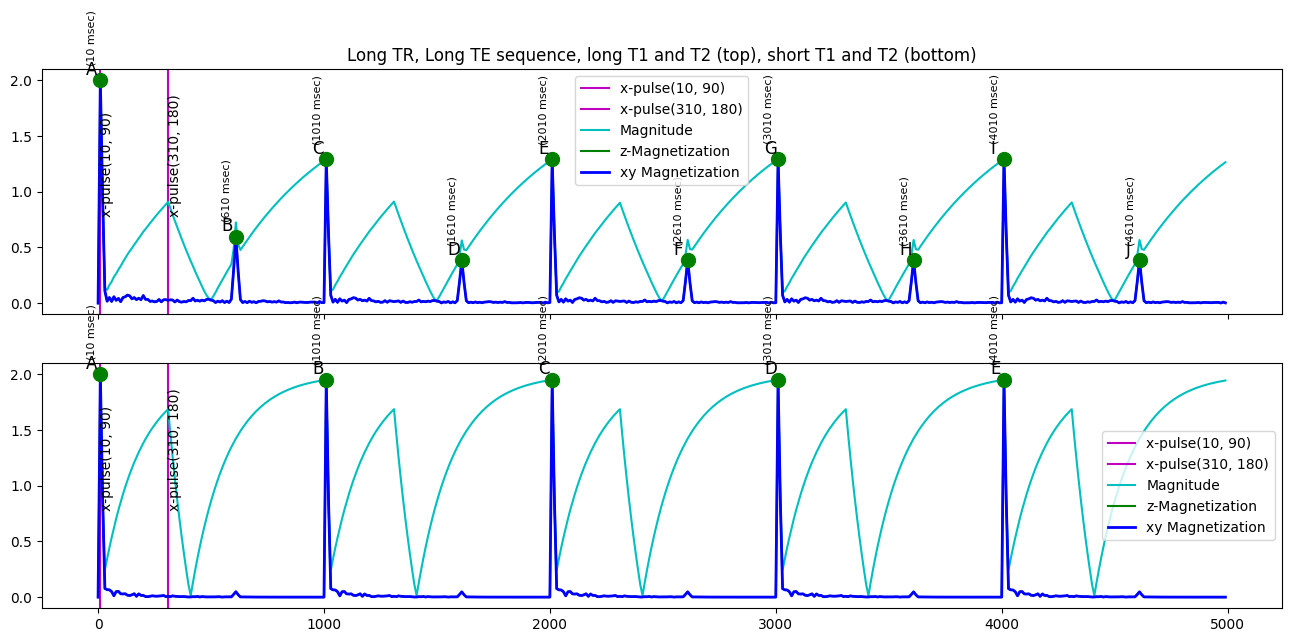

In [328]:

plt.rcParams["figure.figsize"] = (16, 7) #if your plots turn out too large or small, adjust this

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.set_title('Long TR, Long TE sequence, long T1 and T2 (top), short T1 and T2 (bottom)')

pulseSequence_longTR_longTE.setAx(ax1)
pulseSequence_longTR_longTE.plotWithSignal(signalList_long_T1_T2_longTR_longTE)
pulseSequence_longTR_longTE.load(signalList_long_T1_T2_longTR_longTE)
pulseSequence_longTR_longTE.determineHeightOfExpectedPeaks()
pulseSequence_longTR_longTE.showPeakLabels()
# print(pulseSequence.expected_peaks)
# print(signal_over_time[2]) #peaks
#pulseSequence.showExpectedPeaks()

pulseSequence_longTR_longTE.setAx(ax2)
pulseSequence_longTR_longTE.plotWithSignal(signalList_short_T1_T2_longTR_longTE)
pulseSequence_longTR_longTE.load(signalList_short_T1_T2_longTR_longTE)
pulseSequence_longTR_longTE.determineHeightOfExpectedPeaks()
pulseSequence_longTR_longTE.showPeakLabels()


In [ ]:
plt.rcParams["figure.figsize"] = (16, 7) #if your plots turn out too large or small, adjust this

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.set_title('Short TR, Short TE sequence, long T1 and T2 (top), short T1 and T2 (bottom)')

pulseSequence_shortTR_shortTE.setAx(ax1)
pulseSequence_shortTR_shortTE.plotWithSignal(signalList_long_T1_T2_shortTR_shortTE)
pulseSequence_shortTR_shortTE.load(signalList_long_T1_T2_longTR_longTE)
pulseSequence_shortTR_shortTE.determineHeightOfExpectedPeaks()
pulseSequence_shortTR_shortTE.showPeakLabels()
# print(pulseSequence.expected_peaks)
# print(signal_over_time[2]) #peaks
#pulseSequence.showExpectedPeaks()

pulseSequence_shortTR_shortTE.setAx(ax2)
pulseSequence_shortTR_shortTE.plotWithSignal(signalList_short_T1_shortTR_shortTE)
pulseSequence_shortTR_shortTE.load(signalList_short_T1_T2_longTR_longTE)
pulseSequence_shortTR_shortTE.determineHeightOfExpectedPeaks()
pulseSequence_shortTR_shortTE.showPeakLabels()
